<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-mk4kkv4x
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-mk4kkv4x
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=1d75533b07a4320cf653dba5930e54d136b74ae5ddc3b0e1d085beeabe59ad65
  Stored in directory: /tmp/pip-ephem-wheel-cache-aeaceth9/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 817.4 kB/s eta 0:00:00
  

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun! *I want to sleep*

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

*Having a polynomial element could help the model predict according the data and create less uncertainty. Sometimes the data shows a shape other than a 1 poly linear model can't model. Thus, this would cause the model to measure in a straight line but it would have more areas of uncertainty.*

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

*Sometimes linear model is the best option based on your data. Because simplicity is preferred*

**Task3**:

What's the point of using b splines?

*B splines is used to show where the shows partition. Splines are used in polynomials which makes a specific number and adds weight or knots in a set location. This helps to decrease overfitting. It's a way to use a fast version of the GP though its not the same.*

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

*From what I understood, the Gaussian Process is a process when ___ tries to find a relationship between an infinite points of knots or nodes and a measurement for closeness.? It's purpose is to find a relationship within the data.*

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [58]:
#Inserting data
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')
print(howell)

      height     weight   age  male
0    151.765  47.825606  63.0     1
1    139.700  36.485807  63.0     0
2    136.525  31.864838  65.0     0
3    156.845  53.041914  41.0     1
4    145.415  41.276872  51.0     0
..       ...        ...   ...   ...
539  145.415  31.127751  17.0     1
540  162.560  52.163080  31.0     1
541  156.210  54.062497  21.0     0
542   71.120   8.051258   0.0     1
543  158.750  52.531624  68.0     1

[544 rows x 4 columns]


In [125]:
#I want to try polynomial
priors ={"age" : bmb.Prior("Normal", mu=0,sigma=10), "alpha" : bmb.Prior("HalfNormal",sigma=10)}

model_poly = bmb.Model("height ~ poly(age, degree=4)", howell, family = "gaussian", priors=priors)

In [126]:
model_poly

       Formula: height ~ poly(age, degree=4)
        Family: gaussian
          Link: mu = identity
  Observations: 544
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 138.2636, sigma: 68.9427)
            poly(age, degree=4) ~ Normal(mu: [0. 0. 0. 0.], sigma: [1608.0055 1608.0055 1608.0055
                1608.0055])
        
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 27.5771)

In [127]:
idata_poly= model_poly.fit(idata_kwargs={"log_likelihood":True})


Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


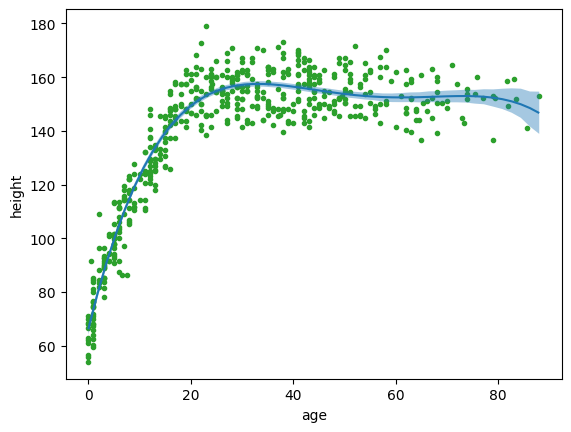

In [128]:
bmb.interpret.plot_predictions(model_poly, idata_poly, "age")
plt.plot(howell.age, howell.height, "C2.", zorder=-3)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


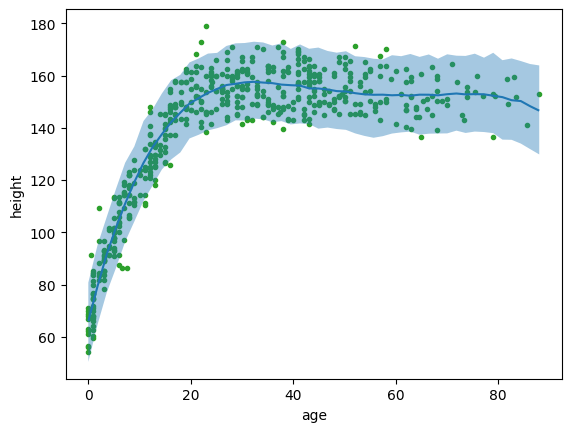

In [129]:
bmb.interpret.plot_predictions(model_poly, idata_poly, "age", pps=True)
plt.plot(howell.age, howell.height, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

*After reading the article, I have heard about climate change and CO2 measurements in the atmosphere but I found it interesting that the article is trying to predict future CO2 measurements. Back on topic, I learned that multiple GP could be added to become one GP in order to make the prediction more convincing and realistic. I was surprised that you could add the same type of data, but that were measured differently. Also, I'm surprised that functions could be used in the model.*

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

*I liked the most was that one square graph built of black squares and has a color bar. It has a diagonal ray of color in the graph. It is my favorite because it reminds me of astronomical x-rays and that one photo of a black hole. Idk, there is something relaxing when you see photos of galaxies, nebulas and stars.*